In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
    # Read data into DataFrame from CSV file
    # cyclone_df = pd.read_csv("Cyclone_ML.csv")
    cyclone_df = pd.read_csv("data/Cyclone_ML.csv")

    # Select features for machine learning and assign to X
    selected_features = cyclone_df[["SURFACE_CODE",	"CYC_TYPE", "LAT", "LON", "CENTRAL_PRES", "MAX_WIND_SPD", "CENTRAL_INDEX (CI)", "WAVE_HEIGHT"]]
    X = selected_features

    # Set y to compass direction of cyclone based on wind direction degree
    y = cyclone_df["WIND_COMPASS"]
    # y = cyclone_df["MAX_REP_WIND_DIR"]
 

    print(X.shape, y.shape)

(1692, 8) (1692,)


In [4]:
cyclone_df

,NAME,TM,TYPE,DATA_SRC,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD,MAX_REP_WIND_DIR,WIND_COMPASS,CENTRAL_INDEX (CI),WAVE_HEIGHT
0,Althea,1971-12-23 23:00:00,T,4.0,3.0,40.0,-19.00,146.40,952.0,46.3,120.0,SE,5.051994,11.079868
1,Annie,1973-11-22 06:00:00,T,2.0,1.0,20.0,-11.00,92.60,1001.0,12.9,100.0,E,2.064005,3.337484
2,Annie,1973-11-22 12:00:00,T,2.0,1.0,20.0,-11.10,93.10,1002.0,12.9,110.0,E,1.950454,3.093691
3,Annie,1973-11-23 00:01:00,T,2.0,1.0,20.0,-11.10,94.20,1003.0,12.9,160.0,S,1.829259,2.838769
4,Annie,1973-11-23 06:00:00,T,2.0,1.0,20.0,-11.10,94.60,1000.0,12.9,210.0,SW,2.171169,3.571799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,George,2007-03-04 18:00:00,T,3.0,2.0,30.0,-14.30,126.40,986.0,20.6,270.0,W,3.306407,6.276868
1688,Carlos,2011-02-15 12:00:00,T,3.0,4.0,21.0,-12.73,130.61,999.0,20.6,350.0,N,2.272897,3.797903
1689,Carlos,2011-02-15 21:00:00,T,3.0,2.0,30.0,-12.54,130.72,993.0,18.0,210.0,SW,2.801605,5.026852
1690,Carlos,2011-02-16 00:00:00,T,3.0,2.0,30.0,-12.41,130.99,995.0,18.0,210.0,SW,2.638106,4.637562


In [5]:
X

,SURFACE_CODE,CYC_TYPE,LAT,LON,CENTRAL_PRES,MAX_WIND_SPD,CENTRAL_INDEX (CI),WAVE_HEIGHT
0,3.0,40.0,-19.00,146.40,952.0,46.3,5.051994,11.079868
1,1.0,20.0,-11.00,92.60,1001.0,12.9,2.064005,3.337484
2,1.0,20.0,-11.10,93.10,1002.0,12.9,1.950454,3.093691
3,1.0,20.0,-11.10,94.20,1003.0,12.9,1.829259,2.838769
4,1.0,20.0,-11.10,94.60,1000.0,12.9,2.171169,3.571799
...,...,...,...,...,...,...,...,...
1687,2.0,30.0,-14.30,126.40,986.0,20.6,3.306407,6.276868
1688,4.0,21.0,-12.73,130.61,999.0,20.6,2.272897,3.797903
1689,2.0,30.0,-12.54,130.72,993.0,18.0,2.801605,5.026852
1690,2.0,30.0,-12.41,130.99,995.0,18.0,2.638106,4.637562


In [8]:
y

0       SE
1        E
2        E
3        S
4       SW
        ..
1687     W
1688     N
1689    SW
1690    SW
1691    SW
Name: WIND_COMPASS, Length: 1692, dtype: object

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Support vector machine linear classifier
model = SVC(kernel='linear')

# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [9]:
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.22458628841607564
Testing Data Score: 0.20567375886524822


In [10]:
predictions = model.predict(X_test_scaled)
acc = accuracy_score(y_test, predictions)
print(f'Model accuracy on test set: {acc:.2f}')

Model accuracy on test set: 0.21


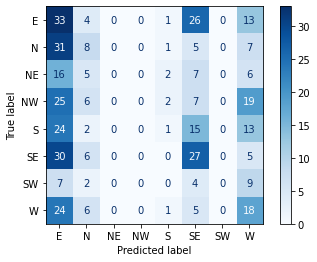

In [11]:
from sklearn.metrics import plot_confusion_matrix
#Plot with Testing Data"
plot_confusion_matrix(model, X_test_scaled, y_test, cmap="Blues")
plt.show()

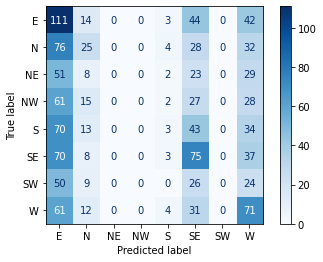

In [18]:
"Plot with Train data"
plot_confusion_matrix(model, X_train_scaled, y_train, cmap="Blues")
plt.show()

In [21]:
plt.savefig('../static/images/clrep_train_svm.png')

<Figure size 432x288 with 0 Axes>

In [22]:
plt.savefig('books_read.png')

<Figure size 432x288 with 0 Axes>

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["E", "N", "NE", "NW", "S", "SE", "SW", "W"]))

              precision    recall  f1-score   support

           E       0.17      0.43      0.25        77
           N       0.21      0.15      0.18        52
          NE       0.00      0.00      0.00        36
          NW       0.00      0.00      0.00        59
           S       0.12      0.02      0.03        55
          SE       0.28      0.40      0.33        68
          SW       0.00      0.00      0.00        22
           W       0.20      0.33      0.25        54

    accuracy                           0.21       423
   macro avg       0.12      0.17      0.13       423
weighted avg       0.14      0.21      0.16       423



C:\Users\Lites\anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
joblib.dump(model, 'cyclone_SVM.smd')
print("Model is saved.")

Model is saved.


In [25]:
joblib.dump(model, '../cyclone_SVM.smd')
print("Model is saved.")

Model is saved.
